In [1]:
import requests
import base64
from PIL import Image
import numpy as np
from io import BytesIO
import cv2

In [3]:
def draw_bounding_box(image,detected_boxes):
    # Convert to numpy
    image = np.array(image)  # RGB format
    
    # Draw boxes
    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
    # Display
    import matplotlib.pyplot as plt
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:

# Load and encode the image to base64
image_path = "../assets/image_database/me.png"  # path to your test image
with open(image_path, "rb") as image_file:
    image_bytes = image_file.read()
    image_base64 = base64.b64encode(image_bytes).decode("utf-8")

# Construct JSON payload
payload = {
    "image_base64": image_base64
}

# Send POST request to the FastAPI endpoint
response = requests.post("http://127.0.0.1:8000/ai/object-detector", json=payload)


In [5]:
items = response.json()
items

{'scores': [0.9954615235328674, 0.9745041728019714],
 'labels': [3, 6],
 'bboxes': [[199.3106689453125,
   162.41094970703125,
   817.2490234375,
   575.3905029296875],
  [107.27285766601562,
   852.9915771484375,
   915.096923828125,
   1536.343994140625]]}

In [7]:
main_image = Image.open("../assets/image_database/me.png").convert("RGB")

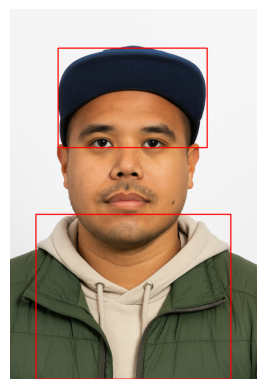

In [17]:
draw_bounding_box(main_image,response.json()["bboxes"])

In [8]:
# Construct JSON payload
payload = {
    "image_base64": image_base64,
    "items":items
}
k=1
# Send POST request to the FastAPI endpoint
response = requests.post(f"http://127.0.0.1:8000/ai/image-retrieval?k={k}", json=payload)

In [9]:
retrieval_output = response.json()
retrieval_output

{'retrieved_image_paths': ['assets/image_database/me.png',
  'assets/image_database/me.png'],
 'scores': [0.831, 0.7907]}

In [10]:
# Construct JSON payload
payload = {
    "image": {
        "image_base64": image_base64
    },
    "data": retrieval_output
}

# Query param
params = {"user_query": "Do you know where I am?"}

# Send request
response = requests.post(
    "http://127.0.0.1:8000/ai/response-generation",
    params=params,
    json=payload
)

print(response.status_code)
print(response.json())

500
{'code': 500, 'message': 'Internal server error', 'data': 'Concept is None. Cannot look up name.'}
